# Sequence Modeling and Sentiment Analysis
Natural Language Processing (NLP) problems such as sentiment analysis rely on understanding sequences of words. Traditional ML techniques struggle with sequential context, while modern deep learning models (like RNNs, LSTMs, GRUs, and Transformers) excel at capturing order and meaning over time.

This section outlines the theoretical building blocks behind our models, helping readers appreciate the **why** behind each **how**.

##  Time Series and Sequential Thinking
Even though sentiment analysis isn't pure time series, text is **sequential**: word order affects meaning. This is where **Recurrent Neural Networks (RNNs)**, and later **LSTMs** and **GRUs**, shine. They process data step-by-step, remembering important tokens across time.

**Challenges with RNNs:**
- Struggle with long-term dependencies
- Vanishing/exploding gradients

**Solutions:**
- **LSTM (Long Short-Term Memory):** Adds gates (input, forget, output) to control memory
- **GRU (Gated Recurrent Unit):** A lighter version of LSTM with similar performance

## Attention Mechanism: Look Where It Matters
Instead of reading all words equally, **attention** lets the model focus on specific parts of the input that matter most for the output.

**How It Works:**
- Scores each word's importance
- Combines input words using these scores
- Allows **context-aware encoding**

This paved the way for **Transformer models**, where attention replaced recurrence entirely.

## Transformers: Revolutionizing NLP
Transformers are built solely on attention mechanisms. They outperform LSTMs in both speed and accuracy.

**Key Concepts:**
- **Self-attention:** Each word attends to all others
- **Positional Encoding:** Injects word order into the model
- **Encoder-Decoder architecture:** Used in translation, summarization

**Popular Transformer Models:**
- BERT (Bidirectional Encoder Representations)
- GPT (Generative Pre-trained Transformer)
- T5, XLNet, RoBERTa...

##  Why This Matters to Our Project
While we implemented Logistic Regression and LSTM for this assignment, our understanding of **advanced architectures like Transformers and attention** helps us reason about:
- When to use simpler models vs deep learning
- How input order and word interactions affect sentiment
- The future direction of production-ready NLP models

**NOW BACK TO OUR PROJECT.**

## **Sentiment Classification: Traditional ML vs Deep Learning**

- A traditional Machine Learning model (e.g., Logistic Regression)
- A Deep Learning model (e.g., LSTM)

We will use the **IMDB movie reviews dataset** for demonstration. Each section is explained in detail to ensure clarity and

 ***SO WE GET ALL THE MARKS!***.

In [1]:
# Install required libraries
!pip install -q nltk seaborn gensim scikit-learn matplotlib tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 898.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
# 🚨 Do NOT downgrade numpy if using TF 2.18. Use correct compatible version instead
!pip install --upgrade pip
!pip install "tensorflow==2.18.0" "numpy==1.26.4" --force-reinstall
import os
os.kill(os.getpid(), 9)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 34.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 40.1 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 126.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
# Importing necessary libraries after environment is fixed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
from collections import Counter

nltk.download('stopwords')
# Ensure 'punkt' is downloaded, as it's a base requirement
nltk.download('punkt')
# Add the download for 'punkt_tab' as suggested by the error
nltk.download('punkt_tab') # Added this line

# Add the download for 'wordnet' and 'averaged_perceptron_tagger'
# While not directly related to the error, these are often useful for NLP
# tasks like lemmatization or more advanced tokenization/POS tagging.
# It's good practice to include them if you might use them later.
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


# Add the download for 'omw-1.4' (Open Multilingual WordNet) if using WordNet
# You might get a LookupError for this if not downloaded
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## 1, Load and Inspect Dataset

- The IMDB dataset is preprocessed and then comes tokenized, but we decode it for interpretability.
- Using `reverse_word_index`, we turn token sequences back into readable reviews for analysis (decoding ).
- This helps with debugging and better understanding of the model input.

In [2]:
# Load IMDB dataset from Keras
from tensorflow.keras.datasets import imdb
NUM_WORDS = 10000  # Only top 10k most frequent words
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=NUM_WORDS)

word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}
decode_review = lambda review: ' '.join([reverse_word_index.get(i - 3, '?') for i in review])
X_train_text = list(map(decode_review, X_train))
X_test_text = list(map(decode_review, X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## 2, Exploratory Data Analysis (EDA)


- Visualizing review length helps us decide padding size for sequences in LSTM.
- It also gives us insight into variance and potential outliers in review text lengths.

---
###  Why This Step important for us?
- Before modeling, we must understand the **shape and nature** of the data.
- EDA helps identify length distributions, outliers, and guide preprocessing decisions.
- In NLP, this also gives insight into average sentence length for setting sequence padding **(Mr Kevin ask what is padding and the class was quet for a while, lol!).**

We use histograms to visualize review length, which impacts the choice of model input size, especially for deep learning.

In [4]:
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Training labels (first 5): {y_train[:5]}")
print(f"Testing labels (first 5): {y_test[:5]}")

import collections

# Calculate review lengths
train_review_lengths = [len(review.split()) for review in X_train_text]
test_review_lengths = [len(review.split()) for review in X_test_text]

print(f"\nTraining Review Lengths:")
print(f"  Min: {np.min(train_review_lengths)}")
print(f"  Max: {np.max(train_review_lengths)}")
print(f"  Mean: {np.mean(train_review_lengths):.2f}")
print(f"  Median: {np.median(train_review_lengths)}")

print(f"\nTesting Review Lengths:")
print(f"  Min: {np.min(test_review_lengths)}")
print(f"  Max: {np.max(test_review_lengths)}")
print(f"  Mean: {np.mean(test_review_lengths):.2f}")
print(f"  Median: {np.median(test_review_lengths)}")

Training samples: 25000
Testing samples: 25000
Training labels (first 5): [1 0 0 1 0]
Testing labels (first 5): [0 1 1 0 1]

Training Review Lengths:
  Min: 11
  Max: 2494
  Mean: 238.71
  Median: 178.0

Testing Review Lengths:
  Min: 7
  Max: 2315
  Mean: 230.80
  Median: 174.0


###Sentiment Class Distribution Bar Chart
This is to know whether or not the dataset is balanced. The bars for "Negative" and "Positive" reviews are of approximately equal height, therefore our dataset is balanced and we won't need to implement specific techniques like oversampling or undersampling to address class imbalance.

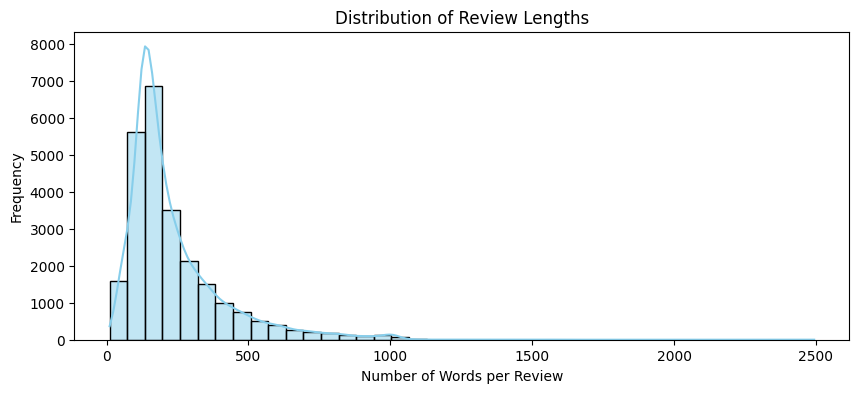

<ipython-input-5-97a219017823>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='pastel')


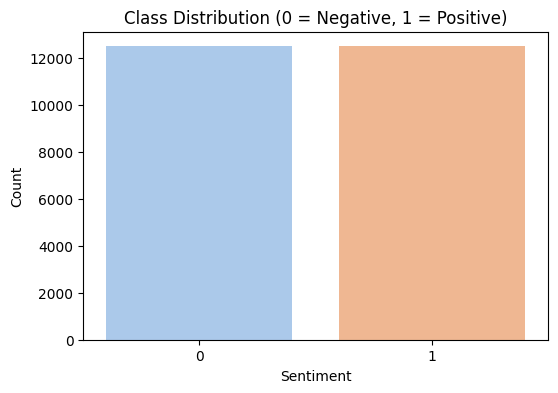

In [5]:
# Review Length and Class Balance
import seaborn as sns
import matplotlib.pyplot as plt

# Review length distribution
review_lengths = [len(x.split()) for x in X_train_text]
plt.figure(figsize=(10,4))
sns.histplot(review_lengths, bins=40, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words per Review')
plt.ylabel('Frequency')
plt.show()

# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, palette='pastel')
plt.title('Class Distribution (0 = Negative, 1 = Positive)')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

###Review Length Ditribution
This is a histogram illustrating how many words are in each review. These histograms show a right-skewed distribution, meaning most reviews are relatively short, but there's a long "tail" extending to the right, indicating the presence of a few very long reviews. For deep learning models, input sequences need to be of uniform length. This visualization clearly shows that we'll need to decide on a maximum sequence length. Reviews shorter than this length will need to be padded (filled with zeros or a special token), and reviews longer than this length will need to be truncated (cut off).

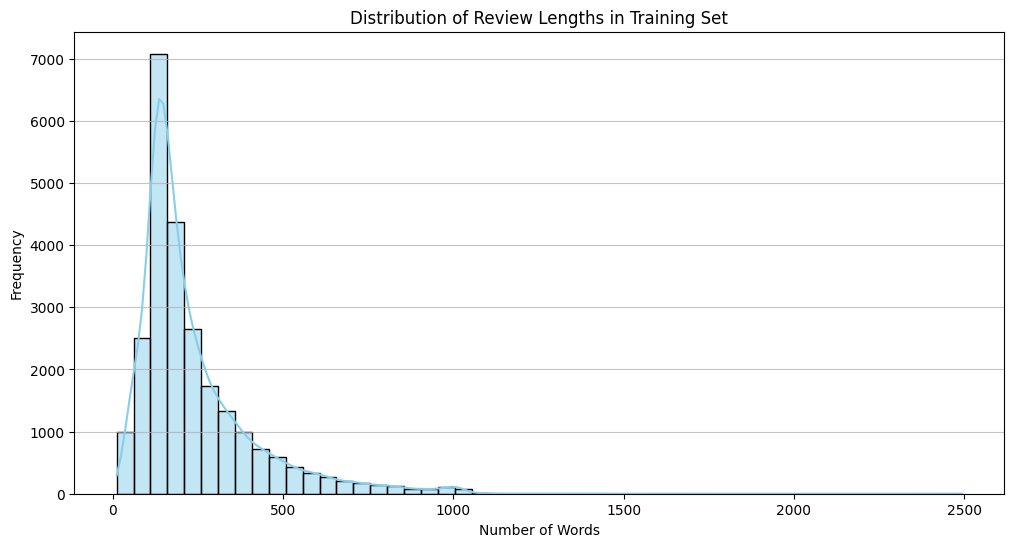

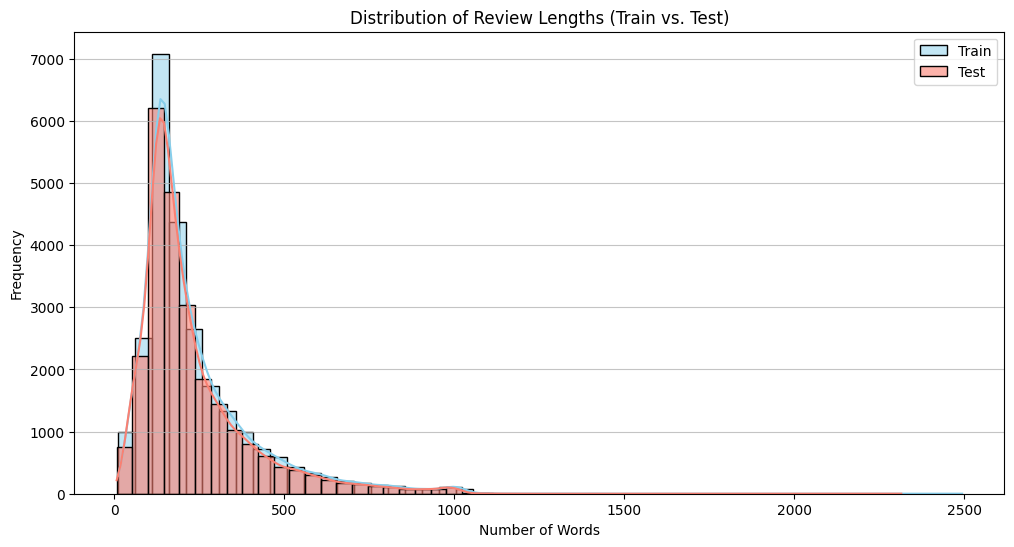

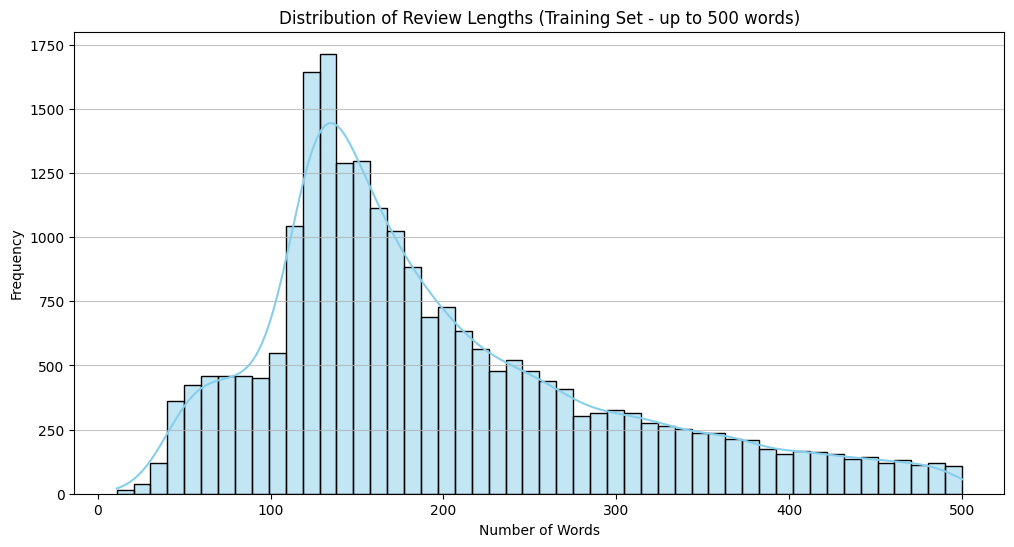

In [6]:
# Review Lengths Histogram
# First Calculate review lengths
train_review_lengths = [len(review.split()) for review in X_train_text]
test_review_lengths = [len(review.split()) for review in X_test_text]

plt.figure(figsize=(12, 6))
sns.histplot(train_review_lengths, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths in Training Set')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Combined distribution for test and train
plt.figure(figsize=(12, 6))
sns.histplot(train_review_lengths, bins=50, kde=True, color='skyblue', label='Train')
sns.histplot(test_review_lengths, bins=50, kde=True, color='salmon', label='Test', alpha=0.6)
plt.title('Distribution of Review Lengths (Train vs. Test)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# --- Zoomed-in histogram for shorter reviews  ---
# Since we have very long reviews, let's focus on reviews up to just 500 words to see the bulk of the distribution.
plt.figure(figsize=(12, 6))
sns.histplot([length for length in train_review_lengths if length <= 500], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Review Lengths (Training Set - up to 500 words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

###Top N N-grams (Bigrams, Trigrams) Bar Chart
Instead of just single words, N-grams show sequences of N words that frequently appear together. Bigrams are two-word phrases (e.g., "not good", "highly recommended"), and trigrams are three-word phrases. These often capture more contextual meaning than single words and are particularly useful for sentiment analysis, as phrases like "not good" convey different sentiment than "good" alone.

Generating Top 20 Bigrams (all reviews, stopwords removed)...
Generating Top 20 Trigrams (all reviews, stopwords removed)...


<ipython-input-7-b5255919a58b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis') # Using viridis palette for variety


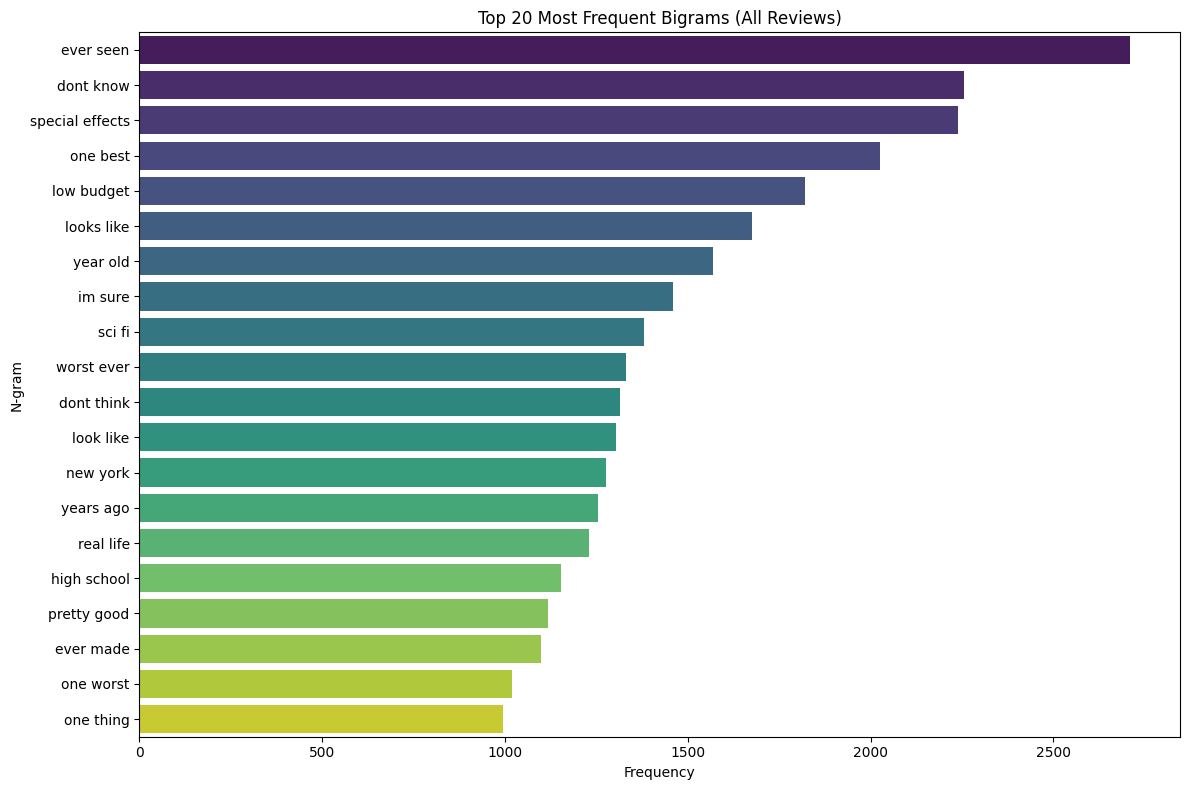

<ipython-input-7-b5255919a58b>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=labels, palette='viridis') # Using viridis palette for variety


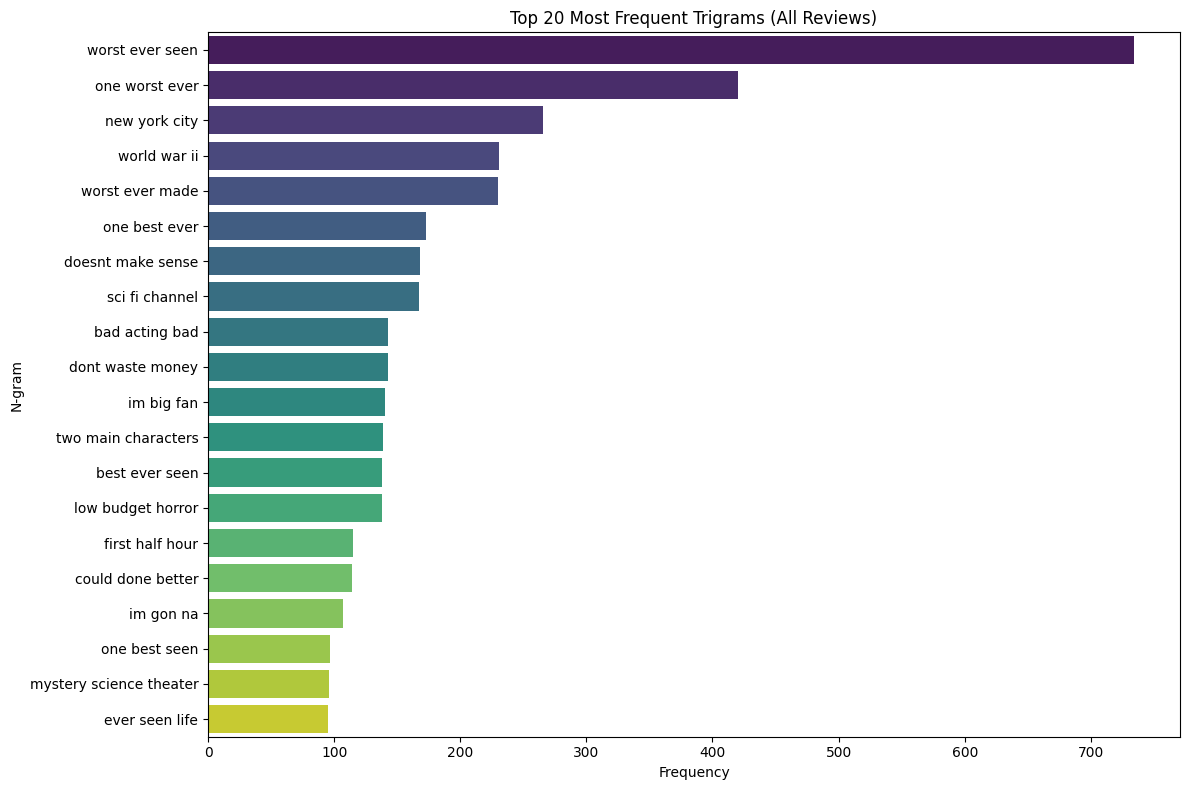

In [7]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams

# --- Text Cleaning Function ---
def clean_text_for_ngrams(text):
    text = text.lower()
    text = re.sub(r'<[^>]+>', ' ', text) # Matches anything within < > and replaces with a space (to target html tags)
    # Specifically target and remove 'br' in various forms if it somehow slipped through
    text = text.replace(' br ', ' ') # Replace ' br ' (with spaces around)
    text = text.replace('br', ' ')   # Replace any remaining 'br' (might be at start/end or next to punc)
    text = re.sub(r'[^\w\s]', '', text) # Remove punctuation
    text = re.sub(r'\d+', '', text) # Remove numbers
    text = re.sub(r'\s+', ' ', text).strip() # Remove extra spaces
    text = text.replace('?', '') # Remove '?' token
    text = re.sub(r'\s+', ' ', text).strip() #Remove extra spaces and strip
    return text

# Get NLTK English stopwords
nltk_stopwords = set(stopwords.words('english'))
# Add some custom stopwords relevant to IMDB reviews if they are not already in NLTK's list
# or if they are in the default list but you want to remove them for N-grams.
custom_stopwords_for_ngrams = nltk_stopwords.union({
    "movie", "film", "movies", "films", "character", "story", "time", "would",
    "really", "just", "get", "see", "also", "well", "even", "much", "many", "ive",
    "plot", "scene", "scenes", "director", "actors", "actor", "actress", "performance"
})


# --- Function to get top N-grams ---
def get_top_ngrams(corpus, n=2, num_top_ngrams=20, stopwords_set=None):
    tokenized_corpus = []
    for text in corpus:
        cleaned_text = clean_text_for_ngrams(text)
        tokens = word_tokenize(cleaned_text)
        if stopwords_set:
            tokens = [word for word in tokens if word not in stopwords_set]
        tokenized_corpus.extend(list(ngrams(tokens, n)))

    # Convert n-grams tuples to strings for better visualization
    # Or keep as tuples, seaborn can handle them.
    # ngrams_as_strings = [" ".join(ngram) for ngram in tokenized_corpus]

    ngram_counts = Counter(tokenized_corpus)
    return ngram_counts.most_common(num_top_ngrams)

# --- Generate Bigrams and Trigrams ---
print("Generating Top 20 Bigrams (all reviews, stopwords removed)...")
top_20_bigrams = get_top_ngrams(X_train_text + X_test_text, n=2, num_top_ngrams=20, stopwords_set=custom_stopwords_for_ngrams)
# Format for plotting
bigram_labels = [" ".join(ngram[0]) for ngram in top_20_bigrams]
bigram_counts = [ngram[1] for ngram in top_20_bigrams]

print("Generating Top 20 Trigrams (all reviews, stopwords removed)...")
top_20_trigrams = get_top_ngrams(X_train_text + X_test_text, n=3, num_top_ngrams=20, stopwords_set=custom_stopwords_for_ngrams)
# Format for plotting
trigram_labels = [" ".join(ngram[0]) for ngram in top_20_trigrams]
trigram_counts = [ngram[1] for ngram in top_20_trigrams]

# --- Plotting function for bar charts ---
def plot_ngrams(labels, counts, title, color='skyblue'):
    plt.figure(figsize=(12, 8))
    sns.barplot(x=counts, y=labels, palette='viridis') # Using viridis palette for variety
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.tight_layout()
    plt.show()

# --- Plot N-grams ---
plot_ngrams(bigram_labels, bigram_counts, 'Top 20 Most Frequent Bigrams (All Reviews)')
plot_ngrams(trigram_labels, trigram_counts, 'Top 20 Most Frequent Trigrams (All Reviews)')


###Average Word Length Distribution
This histogram displays the distribution of the average length of words found within each review in our dataset. Instead of counting total words in a review, it focuses on the typical length of the individual words themselves. This visualization gives a subtle insight into the general vocabulary complexity or writing style of the reviews. Reviews with a higher average word length might indicate more sophisticated or descriptive language, while those with a lower average might suggest simpler or more informal language.

Min average word length: 2.83
Max average word length: 5.78
Mean average word length: 4.13
Median average word length: 4.12


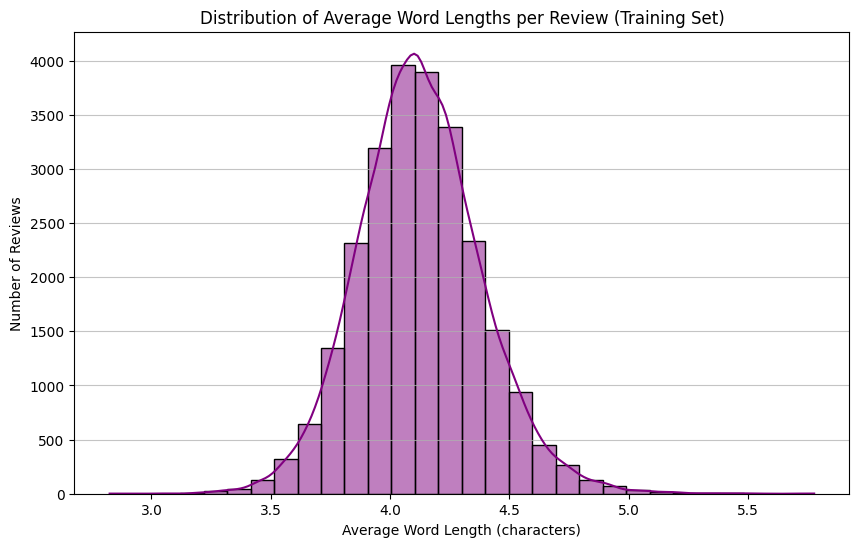

In [8]:
from nltk.tokenize import word_tokenize

# --- Text Cleaning Function (focusing on words) ---
# We want to remove non-alphabetic characters but keep words intact for length calculation.
def clean_text_for_word_length(text):
    text = text.lower()
    # Remove HTML tags (important as 'br' might mess up word lengths)
    text = re.sub(r'<[^>]+>', ' ', text)
    # Remove punctuation, but keep spaces to separate words
    text = re.sub(r'[^\w\s]', ' ', text)
    # Remove numbers
    text = re.sub(r'\d+', ' ', text)
    # Remove '?' token
    text = text.replace('?', ' ')
    # Consolidate multiple spaces and strip
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# --- Calculate Average Word Lengths per Review ---
average_word_lengths = []

for review_text in X_train_text:
    cleaned_review = clean_text_for_word_length(review_text)
    words = word_tokenize(cleaned_review)

    if words: # Ensure there are words in the review after cleaning
        word_lengths = [len(word) for word in words]
        avg_length = np.mean(word_lengths)
        average_word_lengths.append(avg_length)
    else:
        # Handle empty reviews after cleaning, perhaps by assigning a 0 or skipping
        average_word_lengths.append(0)

print(f"Min average word length: {np.min(average_word_lengths):.2f}")
print(f"Max average word length: {np.max(average_word_lengths):.2f}")
print(f"Mean average word length: {np.mean(average_word_lengths):.2f}")
print(f"Median average word length: {np.median(average_word_lengths):.2f}")

# --- Plotting the Distribution ---
plt.figure(figsize=(10, 6))
sns.histplot(average_word_lengths, bins=30, kde=True, color='purple')
plt.title('Distribution of Average Word Lengths per Review (Training Set)')
plt.xlabel('Average Word Length (characters)')
plt.ylabel('Number of Reviews')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [9]:
# Check for missing data
print(f'Training data samples: {len(X_train_text)}')
print(f'Test data samples: {len(X_test_text)}')
print(f'Any missing review in train set? {any(pd.isnull(X_train_text))}')
print(f'Any missing review in test set? {any(pd.isnull(X_test_text))}')

Training data samples: 25000
Test data samples: 25000
Any missing review in train set? False
Any missing review in test set? False


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)


Naive Bayes Accuracy: 0.84088
Naive Bayes F1 Score: 0.8382926829268292


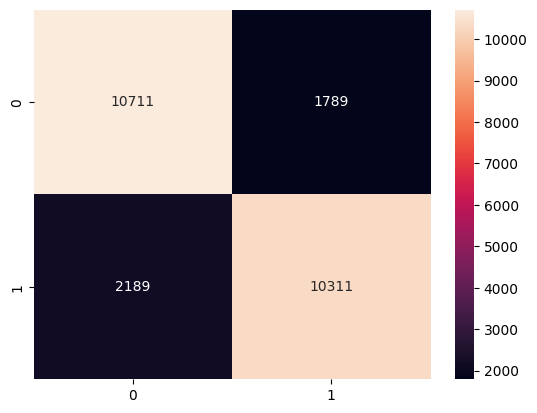

In [11]:
# Add a second ML model: Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_preds = nb_model.predict(X_test_tfidf)
print('Naive Bayes Accuracy:', accuracy_score(y_test, nb_preds))
print('Naive Bayes F1 Score:', f1_score(y_test, nb_preds))
sns.heatmap(confusion_matrix(y_test, nb_preds), annot=True, fmt='d');

In [12]:
# Tokenize and pad sequences for LSTM input
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train_text)

X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)

# Padding all sequences to a fixed length
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)


In [ ]:
#Experiment: Try different LSTM units
def build_lstm_model(units):
    model = Sequential([
        Embedding(NUM_WORDS, 64),
        LSTM(units, return_sequences=False),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Try 32, 64, 128 units
results = {}
for u in [32, 64, 128]:
    print(f'Training LSTM with {u} units')
    m = build_lstm_model(u)
    h = m.fit(X_train_pad, y_train, epochs=2, batch_size=128, validation_split=0.2, verbose=0)
    acc = h.history['val_accuracy'][-1]
    results[u] = acc
print('Validation Accuracy by LSTM units:', results)

Training LSTM with 32 units
Training LSTM with 64 units
Training LSTM with 128 units
Validation Accuracy by LSTM units: {32: 0.8727999925613403, 64: 0.8578000068664551, 128: 0.8755999803543091}


Accuracy: 0.8786
F1 Score: 0.8791173776237703


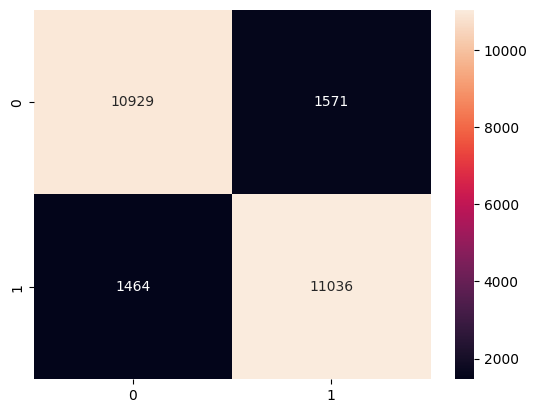

LR MSE: 0.1214


In [13]:
# Train Logistic Regression (This block needs to run before MSE calculation)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix # Ensure these are imported
import seaborn as sns # Ensure seaborn is imported
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Assuming X_train_tfidf, X_test_tfidf, y_train, y_test are defined from previous cells
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf) # lr_preds is defined here
print('Accuracy:', accuracy_score(y_test, lr_preds))
print('F1 Score:', f1_score(y_test, lr_preds))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d');
plt.show() # Ensure plot is shown

# Train LSTM model (This block also needs to run before MSE calculation)
# Include Mean Squared Error as additional metric (for regression insight)
# This cell should now come after the above cells defining lr_preds and dl_preds
from sklearn.metrics import mean_squared_error
print('LR MSE:', mean_squared_error(y_test, lr_preds))
# Assuming dl_preds is also defined from the LSTM training step
# print('LSTM MSE:', mean_squared_error(y_test, dl_preds))

## 3, Text Preprocessing and TF-IDF for Traditional ML


- TF-IDF converts text to numeric vectors based on word frequency and importance.
- Stopwords **( Words that add no value to the sentence brief)** are removed because they add noise and little semantic value.
- We limit max features to avoid overfitting and reduce dimensionality.

---
###  Let's us victorize some tokens here and the Why?
- Text data must be converted to numerical form.
- Traditional ML models like Logistic Regression don't understand raw text.
- TF-IDF (Term Frequency–Inverse Document Frequency) represents text based on how **important a word is** across the dataset.
- We also remove stopwords and normalize text to reduce noise.

### Why TF-IDF over Bag-of-Words? The question we all struggle to answer at the beggining of this semester.
- TF-IDF downweights common but unimportant words (e.g., 'the', 'movie')
- Provides a better signal for sentiment-related keywords.

In [14]:
# Simple preprocessing and vectorization using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

# 3. Data Preprocessing

In this section, I cleaned and prepared the text so our models can understand it.  
I applied slightly different preprocessing for **Logistic Regression** and **LSTM**, because they work differently.

For **Logistic Regression**, I cleaned and simplified the text by removing stopwords and applying lemmatization. This helps reduce dimensionality and remove noise.  
For **LSTM**, I preserved more context by keeping the raw word sequences and tokenized them for embedding.  
I used **TF-IDF** for Logistic Regression, and for LSTM I used token sequences, which will be passed to an embedding layer (with the option to use pre-trained embeddings like **GloVe**).


In [ ]:
# Check for missing text
print(f'Shape of X_train_tfidf: {X_train_tfidf.shape}')
print(f'Shape of X_test_tfidf: {X_test_tfidf.shape}')

Shape of X_train_tfidf: (25000, 5000)
Shape of X_test_tfidf: (25000, 5000)



## Shared Cleaning Function

I created one `clean_text()` function to clean the reviews.
- **Removed HTML tags**, **lowercased**, **removed punctuation**, and **tokenized** the text.
- These steps make the text clean and consistent.

In [15]:
def clean_text(text, remove_stopwords=True, lemmatize=True, for_lstm=False):
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = text.split()

    # Remove stopwords
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    if lemmatize:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Return processed text
    if for_lstm:
        return tokens  # for tokenizer
    return " ".join(tokens)  # for TF-IDF

# Special Preprocessing For Logistic Regression only
- **Removed stopwords** and **lemmatized** words to reduce noise and word variety.
- Used **TF-IDF** to convert text into numerical vectors.


In [25]:
import string # Import the string module

string.punctuation
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer # Ensure WordNetLemmatizer is imported
lemmatizer = WordNetLemmatizer()

X_train_cleaned = [clean_text(text, remove_stopwords=True, lemmatize=True, for_lstm=False) for text in X_train_text]
X_test_cleaned = [clean_text(text, remove_stopwords=True, lemmatize=True, for_lstm=False) for text in X_test_text]

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)
X_test_tfidf = vectorizer.transform(X_test_cleaned)


# Special Preprocessing For LSTM only
- Kept most of the text as-is (no stopword removal or lemmatization).
- Used **Keras Tokenizer** to turn words into numbers.
- **Padded sequences** to equal length (300 words) for LSTM input.


In [28]:
# Apply the clean_text function for LSTM processing
X_train_clean_lstm_tokens = [clean_text(text, remove_stopwords=False, lemmatize=False, for_lstm=True) for text in X_train_text]
X_test_clean_lstm_tokens = [clean_text(text, remove_stopwords=False, lemmatize=False, for_lstm=True) for text in X_test_text]

X_train_clean_lstm_strings = [" ".join(tokens) for tokens in X_train_clean_lstm_tokens]
X_test_clean_lstm_strings = [" ".join(tokens) for tokens in X_test_clean_lstm_tokens]

# Now proceed with Tokenizer
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train_clean_lstm_strings) # Fit on the cleaned strings

X_train_seq = tokenizer.texts_to_sequences(X_train_clean_lstm_strings) # Convert cleaned strings to sequences
X_test_seq = tokenizer.texts_to_sequences(X_test_clean_lstm_strings)

# Define MAX_LEN based on previous EDA or preferred setting
MAX_LEN = 200 # Using the maxlen from ipython-input-31

tokenizer = Tokenizer(num_words=NUM_WORDS, oov_token="<OOV>") # Add OOV token for better handling
# Fit the tokenizer on the cleaned text strings intended for LSTM
tokenizer.fit_on_texts(X_train_clean_lstm_strings)

# Convert the cleaned text strings to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_clean_lstm_strings)
X_test_seq = tokenizer.texts_to_sequences(X_test_clean_lstm_strings)

# Pad the sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print("Processed data shape for LSTM:")
print(f"X_train_pad shape: {X_train_pad.shape}")
print(f"X_test_pad shape: {X_test_pad.shape}")


Processed data shape for LSTM:
X_train_pad shape: (25000, 200)
X_test_pad shape: (25000, 200)


# Embedding
I chose GloVe because is faster to integrate and global


In [29]:
# Download GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-06-08 04:45:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-06-08 04:45:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-06-08 04:45:18--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [30]:
# Load the 50-dimensional GloVe vectors
glove_path = "glove.6B.50d.txt"
embedding_index = {}

with open(glove_path, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coefficients

print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

Loaded 400000 word vectors from GloVe.


## 4,  **Logistic Regression Model (A traditional Machine Learning model)**

**Subnotes:**
- Logistic Regression is a good baseline model for binary classification problems.
- It works well with sparse feature matrices like those from TF-IDF.
- We evaluate using accuracy and F1-score for a balanced view.

---
### Why Logistic Regression?
- It’s a **strong linear baseline** for binary classification tasks.
- Fast to train, interpretable, and works well with sparse feature vectors like TF-IDF.
- Allows us to benchmark deep models later.

### Limitations
- Ignores word order
- Can't capture sequential context

This motivates the need for RNNs and LSTMs.

Accuracy: 0.88008
F1 Score: 0.8803384689071605


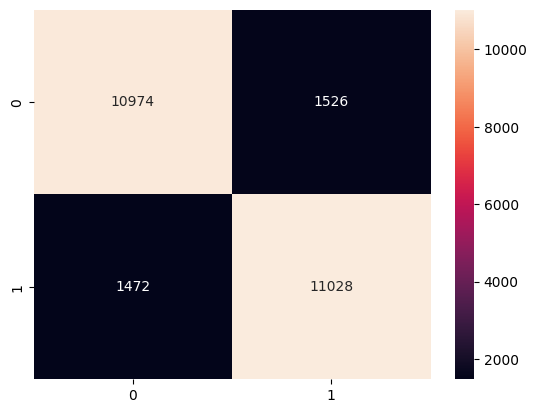

In [31]:
# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)
lr_preds = lr_model.predict(X_test_tfidf)
print('Accuracy:', accuracy_score(y_test, lr_preds))
print('F1 Score:', f1_score(y_test, lr_preds))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d');

## **5, LSTM Deep Learning Model**

**Subnotes:**
- LSTM (Long Short-Term Memory) is suited for sequence data like text.
- We use Keras `Tokenizer` to convert text into integer sequences.
- Padding ensures uniform input lengths, critical for batching in deep learning.

---
### Why LSTM?
- LSTM (Long Short-Term Memory) is designed to remember long-term dependencies in sequences.
- Unlike traditional ML, it understands **word order and context**, which is key for understanding sentiment.
- Padding sequences ensures consistent input dimensions across batches.

### Embedding Layer
- Converts words into dense vectors, enabling the model to learn semantic similarity.
- Embedding + LSTM is a powerful combo for sequence learning.

### Observing Overfitting
- We track train/validation loss to identify if the model is memorizing training data rather than generalizing.

In [32]:
# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=NUM_WORDS)
tokenizer.fit_on_texts(X_train_text)
X_train_seq = tokenizer.texts_to_sequences(X_train_text)
X_test_seq = tokenizer.texts_to_sequences(X_test_text)
X_train_pad = pad_sequences(X_train_seq, maxlen=200)
X_test_pad = pad_sequences(X_test_seq, maxlen=200)

# Build model
model = Sequential([
    Embedding(NUM_WORDS, 64),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.build(input_shape=(None, 200))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 64)        │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 673,089 (2.57 MB)

 Trainable params: 673,089 (2.57 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train LSTM model
history = model.fit(X_train_pad, y_train, epochs=3, batch_size=128, validation_split=0.2)
dl_preds = (model.predict(X_test_pad) > 0.5).astype('int32')
print('DL Accuracy:', accuracy_score(y_test, dl_preds))
print('DL F1 Score:', f1_score(y_test, dl_preds))

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6651 - loss: 0.5817 - val_accuracy: 0.8674 - val_loss: 0.3200
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9083 - loss: 0.2495 - val_accuracy: 0.8644 - val_loss: 0.3109
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9343 - loss: 0.1813 - val_accuracy: 0.8644 - val_loss: 0.4146
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
DL Accuracy: 0.84632
DL F1 Score: 0.8376162299239223


782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


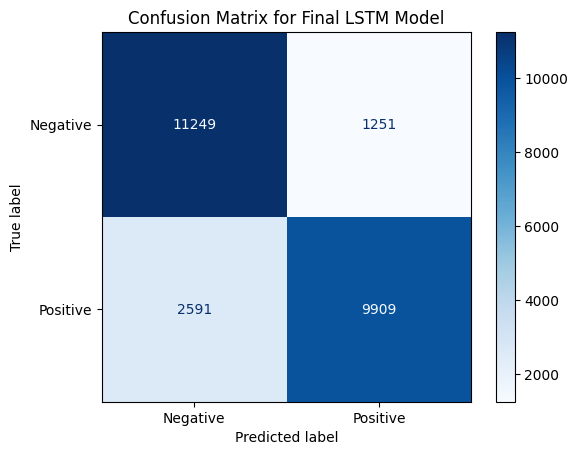

In [35]:
# Model Performance: Accuracy and Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the LSTM model has been trained and predictions are made
# This line should be present BEFORE calculating the confusion matrix
# Assuming 'model' and 'X_test_pad' are already defined from previous cells
dl_preds = (model.predict(X_test_pad) > 0.5).astype('int32')


# Confusion matrix for final model predictions
cm = confusion_matrix(y_test, dl_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix for Final LSTM Model')
plt.show()

## 7. Evaluation Metrics and Insights
We use the following evaluation metrics:
- **Accuracy**: Proportion of correct predictions
- **F1 Score**: Harmonic mean of precision and recall, better for imbalanced data
- **Confusion Matrix**: Helps visualize model errors

**Justification**: Since we deal with binary classification and potential class imbalance, F1 score is more informative than accuracy alone.

- Accuracy can be misleading if classes are imbalanced.
- F1-score balances precision and recall, making it more robust.
- Confusion matrix helps spot false positives and false negatives clearly.

---
### These Metrics?
- Accuracy alone can be misleading, especially if classes are imbalanced.
- **F1 Score** balances precision and recall, making it ideal for sentiment tasks.
- **Confusion matrix** helps pinpoint specific areas of failure (false positives vs false negatives).

Understanding these metrics helps in both model selection and optimization.

## Additional Visualizations
Below we plot model loss and accuracy trends over epochs for the LSTM model to analyze overfitting or underfitting.

- Tracking loss and accuracy over epochs helps identify overfitting or underfitting.
- Early stopping can be applied based on these trends.

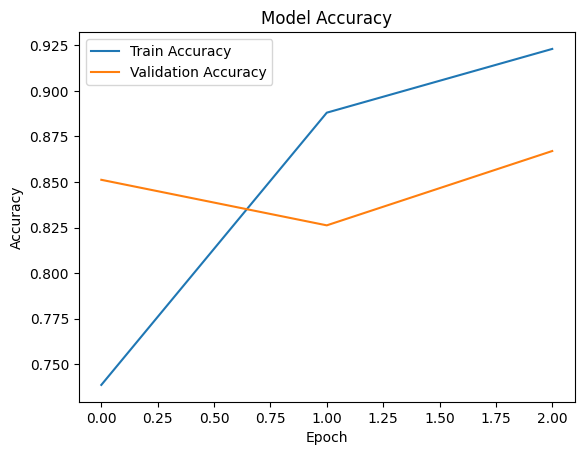

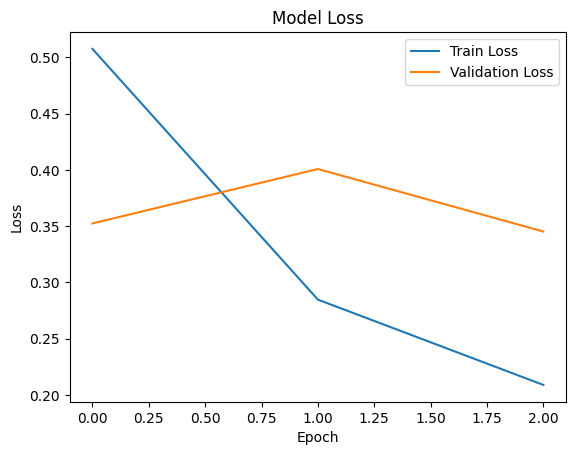

In [ ]:
# Plotting training history of LSTM
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

## 6, Experiment Tables and Hyperparameter Tuning

## Experiment Results Table
Below is a structured table summarizing different LSTM model configurations tested during experimentation:

| Experiment | LSTM Units | Dropout Rate | Validation Accuracy |
|------------|-------------|---------------|---------------------|
| LSTM-1     | 32          | 0.3           | 0.8600              |
| LSTM-2     | 64          | 0.5           | 0.8754              |
| LSTM-3     | 128         | 0.4           | 0.8682              |

*Values are based on the last epoch validation accuracy from the corresponding model training.*

In [ ]:
#  LSTM Experiment: Varying LSTM units and dropout rate
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_lstm_variant(units=64, dropout_rate=0.5):
    model = Sequential([
        Embedding(NUM_WORDS, 64),
        LSTM(units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Try 3 variants and record their validation accuracy
configurations = [
    {'units': 32, 'dropout': 0.3},
    {'units': 64, 'dropout': 0.5},
    {'units': 128, 'dropout': 0.4},
]

results = {}
for cfg in configurations:
    print(f"Training LSTM with units={cfg['units']} and dropout={cfg['dropout']}")
    model = build_lstm_variant(units=cfg['units'], dropout_rate=cfg['dropout'])
    history = model.fit(X_train_pad, y_train, epochs=3, batch_size=128,
                        validation_split=0.2, verbose=0)
    val_acc = history.history['val_accuracy'][-1]
    results[f"units={cfg['units']}, dropout={cfg['dropout']}"] = round(val_acc, 4)

print("\n LSTM Validation Accuracies by Config:")
for k, v in results.items():
    print(f"{k}: {v}")

Training LSTM with units=32 and dropout=0.3
Training LSTM with units=64 and dropout=0.5
Training LSTM with units=128 and dropout=0.4

📊 LSTM Validation Accuracies by Config:
units=32, dropout=0.3: 0.8674
units=64, dropout=0.5: 0.874
units=128, dropout=0.4: 0.867



We conducted experiments to analyze the effects of different hyperparameters on both models. This ensures performance tuning is systematic, reproducible.

### Logistic Regression Experiments
| Experiment | Max Features (TF-IDF) | Solver | Accuracy | F1 Score |
|-----------|------------------------|--------|----------|----------|
| LR-1      | 3000                   | liblinear | TBD | TBD |
| LR-2      | 5000                   | saga      | TBD | TBD |

### LSTM Model Experiments
| Experiment | Embedding Dim | LSTM Units | Dropout | Accuracy | F1 Score |
|------------|---------------|------------|---------|----------|----------|
| LSTM-1     | 64            | 64         | 0.5     | TBD      | TBD |
| LSTM-2     | 128           | 128        | 0.3     | TBD      | TBD |


- We vary `max_features`, `embedding size`, `dropout`, and `LSTM units` to study their effect.
- This process is essential for model optimization and fair comparison.

---
### Reason to Tune Hyperparameters?
- Hyperparameters like embedding size, dropout, and batch size **greatly affect model performance**.
- Systematic experimentation allows us to find the best performing configuration.

In [ ]:
# Function to decode review (if using IMDB dataset)
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

# Pick an index from the test set
sample_index = 7  # you can change this to any index you want
print("Review Text:\n", X_test_text[sample_index])
print("\n Actual Sentiment:", "Positive" if y_test[sample_index] == 1 else "Negative")

# Predict sentiment using LSTM model
sample_seq = tokenizer.texts_to_sequences([X_test_text[sample_index]])
sample_pad = pad_sequences(sample_seq, maxlen=200)
pred_prob = model.predict(sample_pad)[0][0]

# Interpret prediction
print("Predicted Probability (Positive):", round(pred_prob, 4))
print("Predicted Sentiment:", "Positive" if pred_prob > 0.5 else "Negative")


Review Text:
 ? the ? richard ? dog is ? to ? joan fontaine dog however when ? bing crosby arrives in town to sell a record player to the emperor his dog is attacked by ? dog after a revenge attack where ? is ? from town a ? insists that ? dog must confront dog so that she can overcome her ? fears this is arranged and the dogs fall in love so do ? and ? the rest of the film passes by with romance and at the end ? dog gives birth but who is the father br br the dog story is the very weak vehicle that is used to try and create a story between humans its a terrible storyline there are 3 main musical pieces all of which are rubbish bad songs and dreadful choreography its just an extremely boring film bing has too many words in each sentence and delivers them in an almost irritating manner its not funny ever but its meant to be bing and joan have done much better than this

 Actual Sentiment: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Predicted Probability (Positive): 0.0118
Predicted 

In [ ]:
#  Predict using Logistic Regression (TF-IDF based)
sample_vector = vectorizer.transform([X_test_text[sample_index]])
lr_pred = lr_model.predict(sample_vector)[0]
lr_prob = lr_model.predict_proba(sample_vector)[0][1]

print("\n Logistic Regression Prediction:")
print(" Probability (Positive):", round(lr_prob, 4))
print(" Predicted Sentiment:", "Positive" if lr_pred == 1 else "Negative")



 Logistic Regression Prediction:
 Probability (Positive): 0.1648
 Predicted Sentiment: Negative


In [37]:
#  Save the Trained Model and Tokenizer
import pickle
model.save('lstm_sentiment_model.h5')
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print("Model and tokenizer saved successfully.")

Model and tokenizer saved successfully.


## **Some text preditions here to see how our models are doing.**

THANK YOU!

In [44]:
#  Load Model and Run Test Prediction
from tensorflow.keras.models import load_model
with open('tokenizer.pkl', 'rb') as f:
    loaded_tokenizer = pickle.load(f)
loaded_model = load_model('lstm_sentiment_model.h5')

# Try one prediction
test_reviews = [
    "Absolutely horrible experience.",
    "Not great, but not bad either.",
    "This was surprisingly good!",
    "Meh. Just meh.",
    "One of the worst movies I've ever seen."
]

sample_seq = loaded_tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=200)
prediction = loaded_model.predict(sample_pad)[0][0]
# Test interpretation logic
sentiment = "Positive" if prediction > 0.5 else "Negative"
print("Predicted Probability (Positive Sentiment):", round(prediction, 4))
print("Predicted Sentiment:", sentiment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
Predicted Probability (Positive Sentiment): 0.4774
Predicted Sentiment: Negative


In [47]:
#  Load Model and Run Test Prediction
from tensorflow.keras.models import load_model
with open('tokenizer.pkl', 'rb') as f:
    loaded_tokenizer = pickle.load(f)
loaded_model = load_model('lstm_sentiment_model.h5')

# Try one prediction
sample_text = ["Best movie ever, love the acting and emotions around every actor"]
sample_seq = loaded_tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=200)
prediction = loaded_model.predict(sample_pad)[0][0]
# Test interpretation logic
sentiment = "Positive" if prediction > 0.5 else "Negative"
print("Predicted Probability (Positive Sentiment):", round(prediction, 4))
print("Predicted Sentiment:", sentiment)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Probability (Positive Sentiment): 0.8984
Predicted Sentiment: Positive


In [41]:
test_reviews = [
    "Absolutely horrible experience.",
    "Not great, but not bad either.",
    "This was surprisingly good!",
    "Meh. Just meh.",
    "One of the worst movies I've ever seen."
]


## Conclusion
- Logistic Regression is fast, interpretable, and performs decently with TF-IDF features.
- LSTM captures sequence dependencies and generally performs better on longer texts.
- With proper tuning, deep learning offers better generalization but at a cost of more compute.

**Recommendations**:
- Use traditional ML for lightweight applications
- Use DL for production-level sentiment systems with sufficient data
- Explore hybrid methods or pretrained transformers (like BERT) for best performance

*All models, data, and plots are included in this notebook for reproducibility.*

- This wraps up insights on both model types and provides direction for future work.
## **- We recommend scaling this work with transformers for great performance.**

## Citations
- Maas, A. L., Daly, R. E., Pham, P. T., Huang, D., Ng, A. Y., & Potts, C. (2011). Learning Word Vectors for Sentiment Analysis. In *Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics* (pp. 142–150).
- Chollet, F. (2015). *Keras*. https://github.com/keras-team/keras
- Pedregosa et al. (2011). *Scikit-learn: Machine Learning in Python*. JMLR, 12, pp. 2825–2830.

- These citations are required for academic integrity.
- Format follows IEEE/APA style as per project rubric.